In [1]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding & Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# To count the class values dynamically
from collections import Counter

# Metrics for Model Evaluation
from sklearn.metrics import ( 
roc_auc_score,
roc_curve,
classification_report,
confusion_matrix,ConfusionMatrixDisplay
)

# Data Analysis

In [2]:
# Data loading and understanding
churn_data=pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
# churn_data shape
# useful for understanding about the rows and columns of the data or we can say record & features
churn_data.shape

(7043, 33)

In [4]:
# info of the data ---> Meta Data 
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
# first 2 rows of the churn_data
churn_data.head(2)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved


In [6]:
# Checking null values if exists
churn_data.isnull().sum()

# Analysis : 
# 1.we can see clearly that 32 columns has no missing values .
# 2.In 1 column which is 'Churn Reason' has 5167 missing values.
# Reason : people who churned there reason of churning is given but who didn't there is no value which is 'nan' value
# Action: we have to drop the column 'Churn Reason' beacause 73% data is missing if we use this in prediction then data leakage will be happen

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [7]:
# Dropping the columne 'Churn Reason'
churn_data.drop('Churn Reason',axis=1,inplace=True)

In [8]:
churn_data.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
dtype: int64

In [9]:
# value counts
churn_data['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [10]:
churn_data['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
churn_data.head(1)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239


### Data & its Dtype analysis

**Note:**<br>
*1. Categorical values analysis which has only 2 categories*<br>
*2. We are not taking Churn Level because we are targeting Churn Value*

In [12]:
# Analysis of categorical value  so that we can map it
cat=churn_data[['Gender','Senior Citizen','Partner','Dependents','Phone Service','Paperless Billing']]
for column in cat:
    print(f'{churn_data[column].value_counts()}')
    print('==*=='*15)

Gender
Male      3555
Female    3488
Name: count, dtype: int64
==*====*====*====*====*====*====*====*====*====*====*====*====*====*====*==
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64
==*====*====*====*====*====*====*====*====*====*====*====*====*====*====*==
Partner
No     3641
Yes    3402
Name: count, dtype: int64
==*====*====*====*====*====*====*====*====*====*====*====*====*====*====*==
Dependents
No     5416
Yes    1627
Name: count, dtype: int64
==*====*====*====*====*====*====*====*====*====*====*====*====*====*====*==
Phone Service
Yes    6361
No      682
Name: count, dtype: int64
==*====*====*====*====*====*====*====*====*====*====*====*====*====*====*==
Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64
==*====*====*====*====*====*====*====*====*====*====*====*====*====*====*==


In [13]:
# Value Mapping to the Categoris 
for col in cat:
    churn_data[col]=churn_data[col].replace({
        'Male':1,
        'Female':0,
        'Yes':1,
        'No':0
    })

churn_data.head(1)

C:\Users\talib\AppData\Local\Temp\ipykernel_48704\3088768453.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_data[col]=churn_data[col].replace({


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,1,86,3239


**Multiple Categoris**

In [14]:
columns=churn_data[['Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']]
for col in columns:
    churn_data[col]=churn_data[col].replace({
        'No phone service':'No',
        'No internet service':'No'
    }
                                           )
        

In [15]:
# Now converting Object to Numeric type for scaling next
churn_data['Total Charges']=churn_data['Total Charges'].replace('',None)
churn_data['Total Charges']=pd.to_numeric(
    churn_data['Total Charges'],
    errors='coerce'
)

# if there is any None value then filling it with the median
churn_data['Total Charges']=churn_data['Total Charges'].fillna(churn_data['Total Charges'].median())

# checking dtype
churn_data['Total Charges'].dtype

dtype('float64')

## Data Understanding by Visualizing it

#### plot 1.

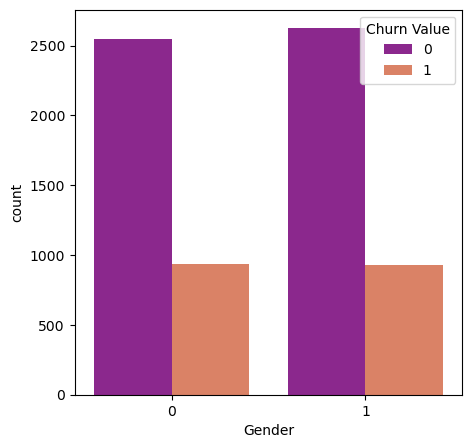

In [16]:
# plot 1.1 Gender vs Churn Value
plt.figure(figsize=(5,5))
sns.countplot(data=churn_data,x=churn_data['Gender'],hue=churn_data['Churn Value'],palette='plasma')
plt.show()

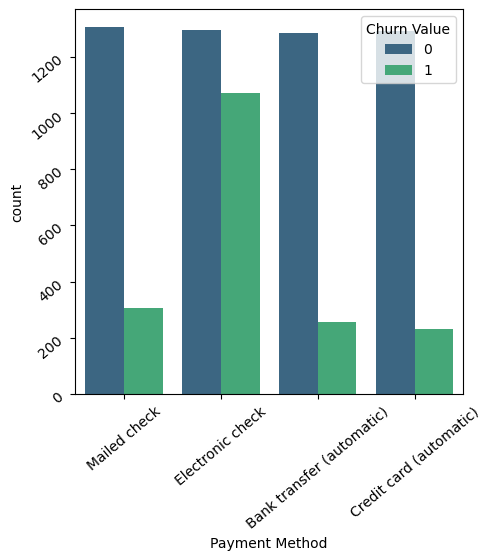

In [17]:
# plot 1.2 Payment Method vs Churn Value
plt.figure(figsize=(5,5))
sns.countplot(data=churn_data,x=churn_data['Payment Method'],hue=churn_data['Churn Value'],palette='viridis')
plt.xticks(rotation=40)
plt.yticks(rotation=40)
plt.show()

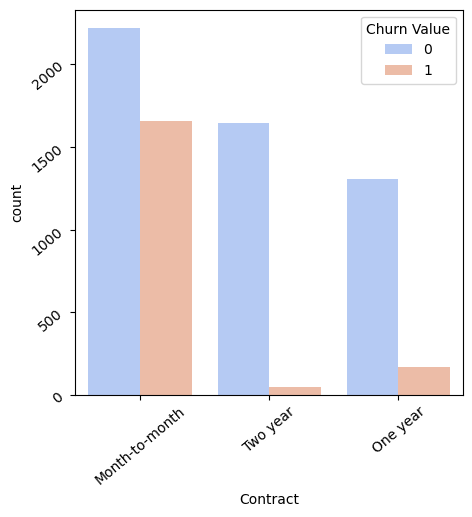

In [18]:
# plot 1.3 Contract vs Churn Value
plt.figure(figsize=(5,5))
sns.countplot(data=churn_data,x=churn_data['Contract'],hue=churn_data['Churn Value'],palette='coolwarm')
plt.xticks(rotation=40)
plt.yticks(rotation=40)
plt.show()

#### plot 2.

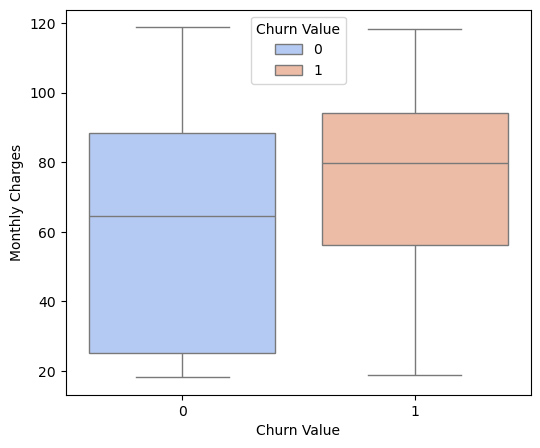

In [19]:
# 2.1 Churn Value vs Monthly Charges
plt.figure(figsize=(6,5))
sns.boxplot(data=churn_data,x=churn_data['Churn Value'],y=churn_data['Monthly Charges'],hue=churn_data['Churn Value'],palette='coolwarm')
plt.show()

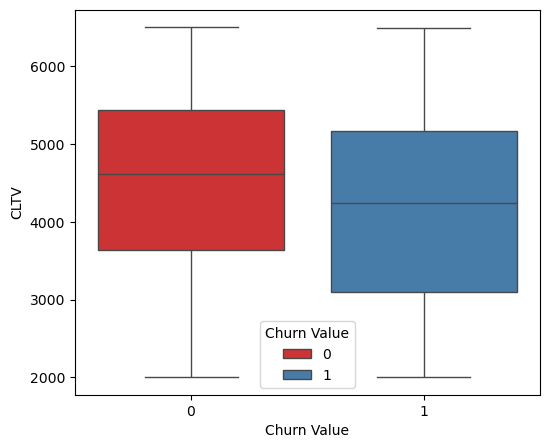

In [20]:
# 2.2 Churn Value vs CLTV
plt.figure(figsize=(6,5))
sns.boxplot(data=churn_data,x=churn_data['Churn Value'],y=churn_data['CLTV'],hue=churn_data['Churn Value'],palette='Set1')
plt.show()

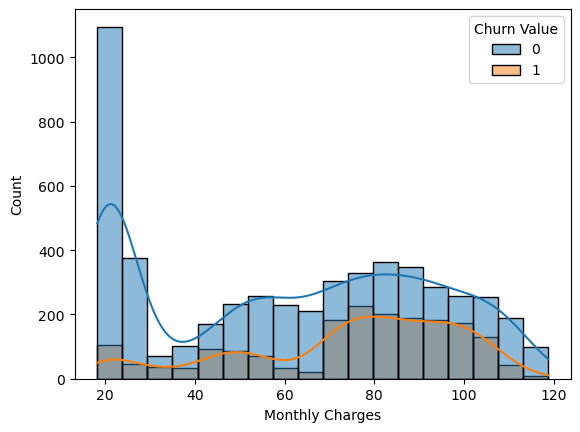

In [21]:
# plot 2.3
sns.histplot(data=churn_data,x='Monthly Charges',hue=churn_data['Churn Value'],kde=True)
plt.show()

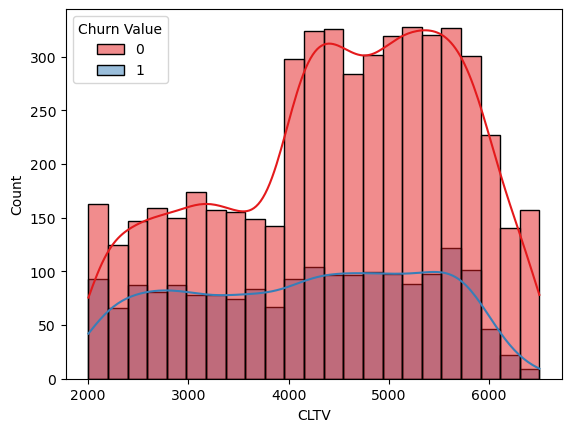

In [22]:
sns.histplot(data=churn_data,x='CLTV',hue=churn_data['Churn Value'],kde=True,palette='Set1')
plt.show()

#### plot 3.

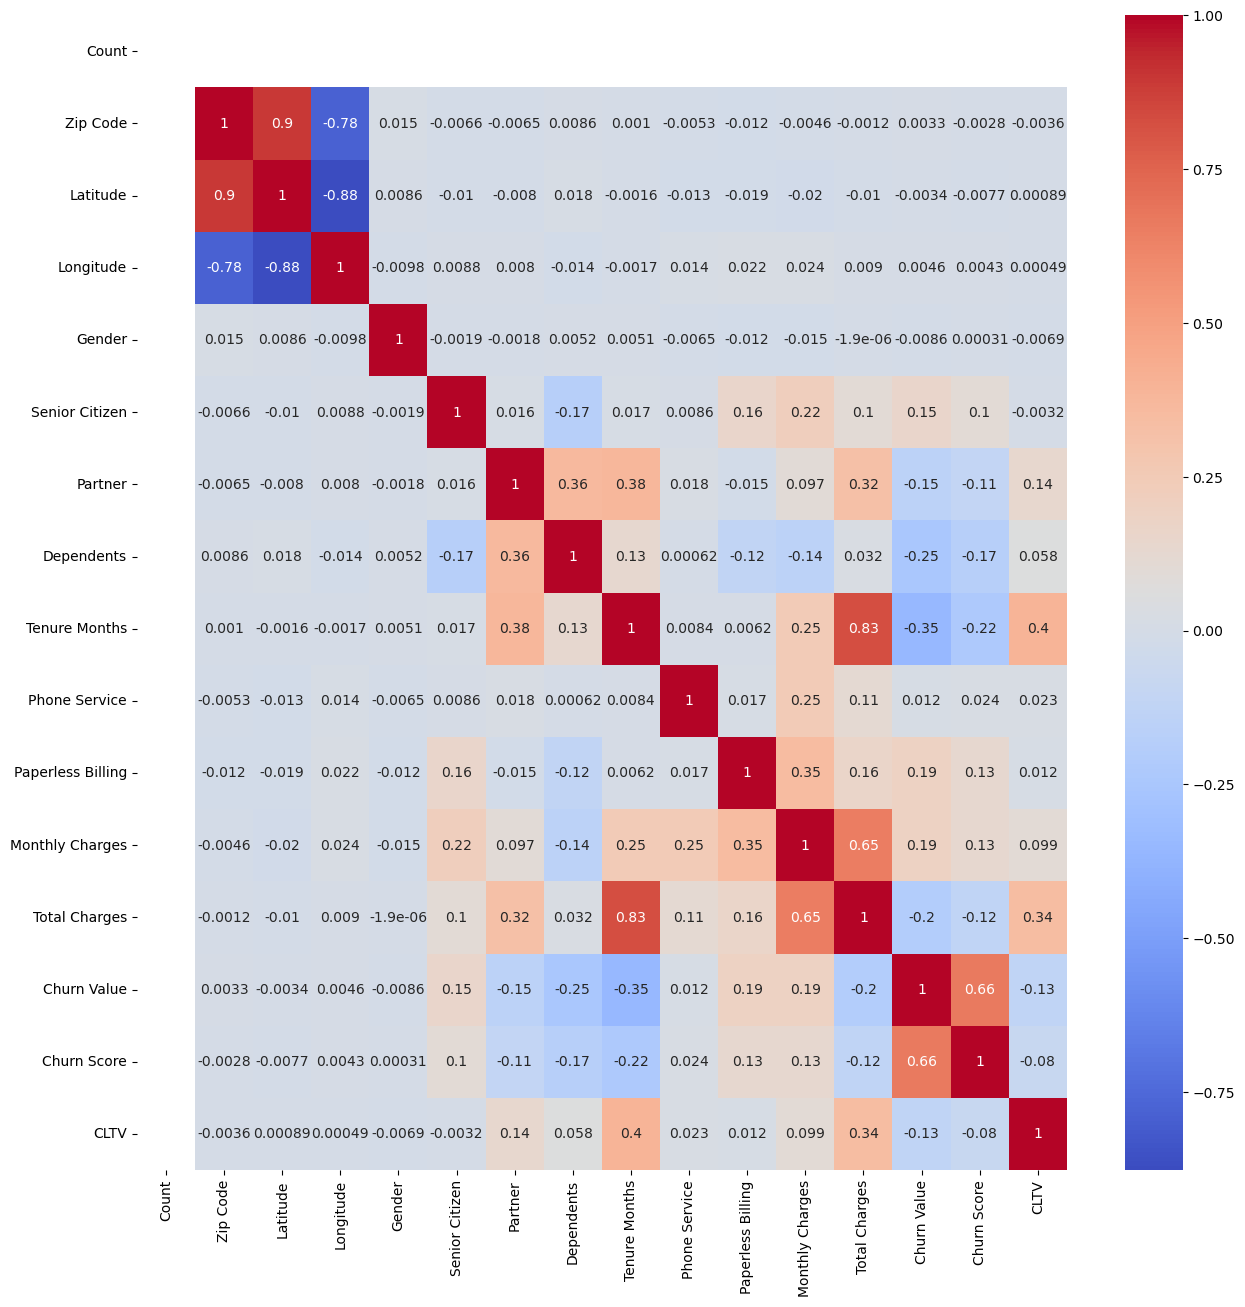

In [23]:
plt.figure(figsize=(15,15))
numerical_cols=churn_data.select_dtypes(include=['int64','float64'])
sns.heatmap(numerical_cols.corr(),annot=True,cmap='coolwarm')
plt.show()

In [24]:
churn_data.head(1)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,1,86,3239


In [25]:
# Here we are taking 'Churn level' as target variable.
# Some Features needs to be drop because they can create the leakage of the data
# Ex:	CustomerID	Count	Country	State	City	Zip Code	Lat Long	Latitude	Longitude	
X=churn_data.drop(columns=['CustomerID','Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','Churn Value','Churn Label','Churn Score','CLTV'])
y=churn_data['Churn Value']

In [26]:
print(X.shape)
X.info()

(7043, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   int64  
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   int64  
 16  Payment Metho

In [27]:
print(y.shape)
print(y)

(7043,)
0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Value, Length: 7043, dtype: int64


## Data splitting 

In [28]:
# splitting the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,stratify=y,random_state=42)

In [29]:
print(X_train.shape)
X_train.head(1)

(5634, 19)


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
4626,1,0,0,0,35,0,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,0,Electronic check,49.2,1701.65


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4626 to 6017
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5634 non-null   int64  
 1   Senior Citizen     5634 non-null   int64  
 2   Partner            5634 non-null   int64  
 3   Dependents         5634 non-null   int64  
 4   Tenure Months      5634 non-null   int64  
 5   Phone Service      5634 non-null   int64  
 6   Multiple Lines     5634 non-null   object 
 7   Internet Service   5634 non-null   object 
 8   Online Security    5634 non-null   object 
 9   Online Backup      5634 non-null   object 
 10  Device Protection  5634 non-null   object 
 11  Tech Support       5634 non-null   object 
 12  Streaming TV       5634 non-null   object 
 13  Streaming Movies   5634 non-null   object 
 14  Contract           5634 non-null   object 
 15  Paperless Billing  5634 non-null   int64  
 16  Payment Method     5634 no

In [31]:
X_train['Tenure Months'].value_counts()

Tenure Months
1     487
72    292
2     187
3     150
71    142
     ... 
21     45
44     43
28     42
36     40
0       8
Name: count, Length: 73, dtype: int64

In [32]:
# Numerical & Categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_cols=X_train[['Tenure Months','Monthly Charges','Total Charges']].columns.tolist()

In [33]:
## Column Transformer
preprocessor=ColumnTransformer(
    transformers=[
        ('numerical',StandardScaler(),numeric_cols),
        ('categorical',OneHotEncoder(handle_unknown='ignore'),cat_cols)
    ]
)

# Applying the transformation
# fit_transform only on X_train
X_train=preprocessor.fit_transform(X_train)

# transform only on X_test
X_test=preprocessor.transform(X_test)

In [34]:
print(X_train.shape)


(5634, 27)


# Model Creation & Training and testing of it

## Logistics Regression Model

In [35]:
# Model Initialization
lr_model=LogisticRegression(max_iter=1000,class_weight='balanced')

# Model training
lr_model.fit(X_train,y_train)

# Prediction of the model
#y_pred=lr_model.predict(X_test)

# Probability prediction
y_prob=lr_model.predict_proba(X_test)[:,1]
y_pred=(y_prob>0.35).astype(int)

print('==========================LogisticRegression Model Prediction on Testing Data========================\n')
print(classification_report(y_test,y_pred))     

==========================LogisticRegression Model Prediction on Testing Data========================

              precision    recall  f1-score   support

           0       0.95      0.59      0.73      1035
           1       0.45      0.91      0.60       374

    accuracy                           0.67      1409
   macro avg       0.70      0.75      0.66      1409
weighted avg       0.82      0.67      0.69      1409




------------Roc Auc Score--------------
Roc_Auc_Score:0.8404

----------Roc Curve Through Visualization----------


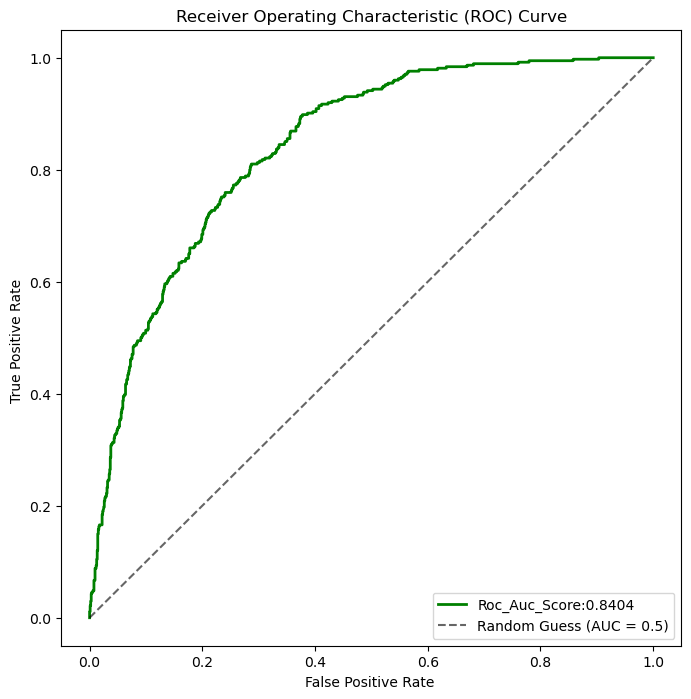

In [36]:
print('\n------------Roc Auc Score--------------')
roc_score=roc_auc_score(y_test,y_prob)
print(f'Roc_Auc_Score:{roc_score:.4f}')

print('\n----------Roc Curve Through Visualization----------')
plt.figure(figsize=(8,8))
fpr,tpr,_=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label=f'Roc_Auc_Score:{roc_score:.4f}',color='green',linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)', alpha=0.6)
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



<Figure size 800x600 with 0 Axes>

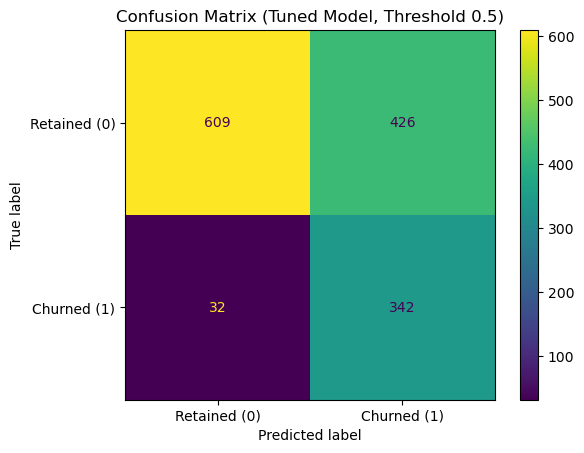

In [37]:
# Confusion Matrix
c_mat=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_mat, display_labels=['Retained (0)', 'Churned (1)'])

plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis')
plt.title('Confusion Matrix (Tuned Model, Threshold 0.5)')
plt.show()

## Random Forest Classifier

In [38]:
# Model initialization
rfc=RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    class_weight={0:1,1:2},
    random_state=42
)

# model training
rfc.fit(X_train,y_train)

# prediction
#y_rfc_pred=rfc.predict(X_test)

# probability
y_rfc_prob=rfc.predict_proba(X_test)[:,1]
y_rfc_pred=(y_rfc_prob>0.35).astype(int)

print(classification_report(y_test,y_rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1035
           1       0.49      0.83      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.70      1409
weighted avg       0.81      0.73      0.74      1409




------------Roc Auc Score--------------
Roc_Auc_Score:0.8408

----------Roc Curve Through Visualization----------


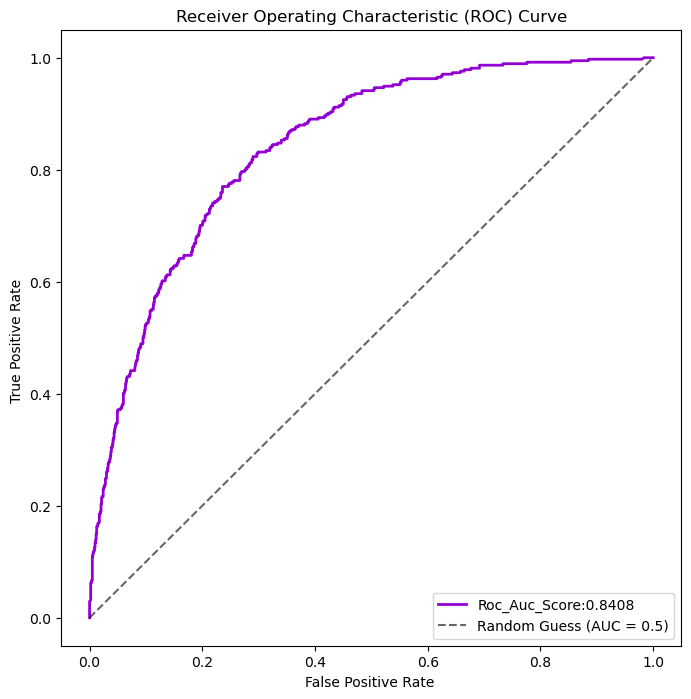

In [39]:
print('\n------------Roc Auc Score--------------')
roc_score2=roc_auc_score(y_test,y_rfc_prob)
print(f'Roc_Auc_Score:{roc_score2:.4f}')

print('\n----------Roc Curve Through Visualization----------')
plt.figure(figsize=(8,8))
fpr,tpr,_=roc_curve(y_test,y_rfc_prob)
plt.plot(fpr,tpr,label=f'Roc_Auc_Score:{roc_score2:.4f}',color='darkviolet',linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)', alpha=0.6)
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<Figure size 800x600 with 0 Axes>

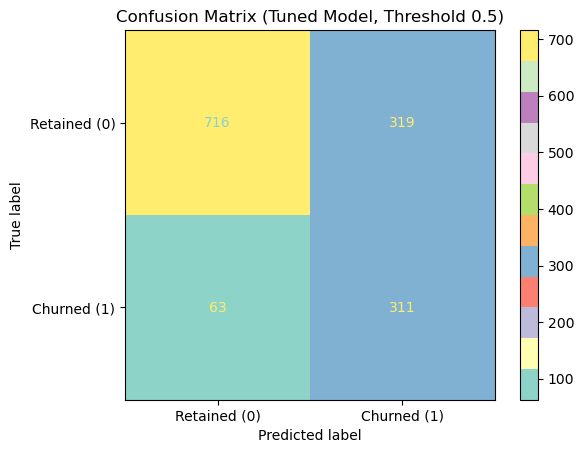

In [40]:
# Confusion Matrix
c_mat2=confusion_matrix(y_test,y_rfc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_mat2, display_labels=['Retained (0)', 'Churned (1)'])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Set3')
plt.title('Confusion Matrix (Tuned Model, Threshold 0.5)')
plt.show()

# XGBClassifier

In [41]:
y_train.value_counts()

Churn Value
0    4139
1    1495
Name: count, dtype: int64

In [42]:
y_test.value_counts()

Churn Value
0    1035
1     374
Name: count, dtype: int64

In [43]:
# Class pos weight
counter=Counter(y_train)
print('Counter:',counter)

scale_pos_weight=counter[0]/counter[1]
print(f'Scale_pos_weight:{scale_pos_weight:.4f}')

Counter: Counter({0: 4139, 1: 1495})
Scale_pos_weight:2.7686


In [44]:
# Model initialization
xgb=XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    eval_metrics='logloss',
    random_state=42
)

# Model Training
xgb.fit(X_train,y_train)

C:\Users\talib\anaconda3\Lib\site-packages\xgboost\training.py:200: UserWarning: [00:13:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "eval_metrics" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, ...)

In [45]:
# Model Prediction
y_xgb_pred=xgb.predict(X_test)
y_xgb_probab=xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_xgb_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409




------------Roc Auc Score--------------
Roc_Auc_Score:0.8408

----------Roc Curve Through Visualization----------


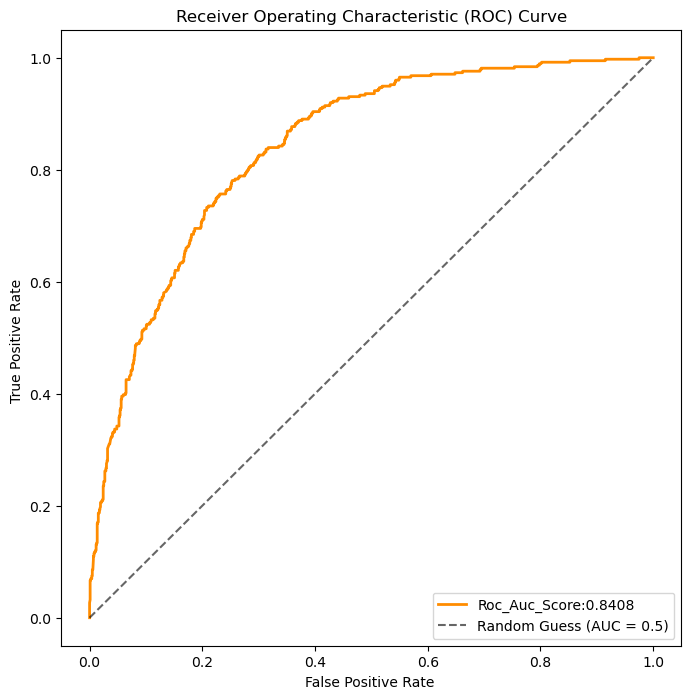

In [46]:
print('\n------------Roc Auc Score--------------')
roc_score3=roc_auc_score(y_test,y_xgb_probab)
print(f'Roc_Auc_Score:{roc_score3:.4f}')

print('\n----------Roc Curve Through Visualization----------')
plt.figure(figsize=(8,8))
fpr,tpr,_=roc_curve(y_test,y_xgb_probab)
plt.plot(fpr,tpr,label=f'Roc_Auc_Score:{roc_score3:.4f}',color='darkorange',linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)', alpha=0.6)
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<Figure size 800x600 with 0 Axes>

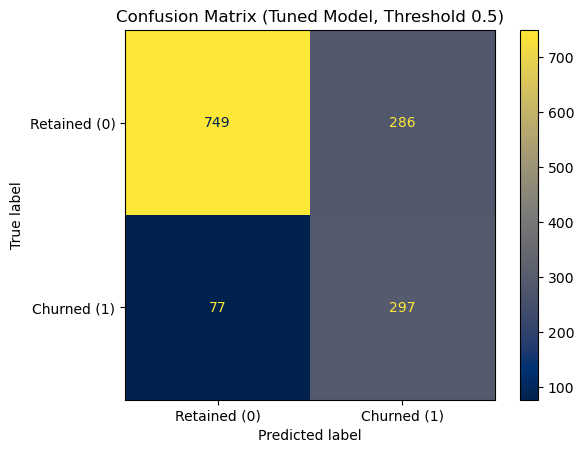

In [47]:
# Confusion Matrix
c_mat3=confusion_matrix(y_test,y_xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_mat3, display_labels=['Retained (0)', 'Churned (1)'])

plt.figure(figsize=(8, 6))
disp.plot(cmap='cividis')
plt.title('Confusion Matrix (Tuned Model, Threshold 0.5)')
plt.show()

### Feature importance

----------------The top 5 Features that is driving the Churn prediction---------------------
    Importance                                       Feature
20    0.539024          categorical__Contract_Month-to-month
6     0.130198     categorical__Internet Service_Fiber optic
25    0.049798  categorical__Payment Method_Electronic check
7     0.045577              categorical__Internet Service_No
21    0.032729                categorical__Contract_One year


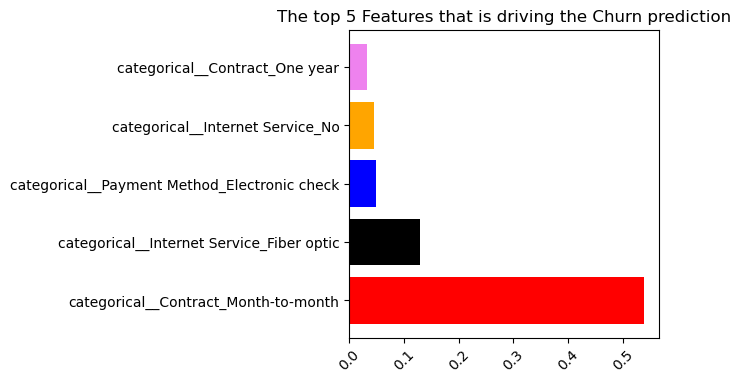

In [70]:
# feature importance
importance=xgb.feature_importances_
feature_names = preprocessor.get_feature_names_out()

xgb_feature_importance=pd.DataFrame(
    {
    'Importance':importance,
    'Feature':feature_names}).sort_values(by='Importance',ascending=False)

print('----------------The top 5 Features that is driving the Churn prediction---------------------')
top_5_features=xgb_feature_importance.head()

print(top_5_features)

plt.figure(figsize=(4,4))
plt.barh(top_5_features['Feature'],top_5_features['Importance'],color=['red','black','blue','orange','violet'],align='center')
plt.title('The top 5 Features that is driving the Churn prediction')
plt.xticks(rotation=45)
plt.show()